## Author
Jarosław Wełeszczuk

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt 

from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score, make_scorer

import seaborn as sns

In [2]:
caly_df=pd.read_csv('Prepared_geko_data.csv',sep=';')

In [3]:
caly_df

,time,temperatur,Sleep poze,Sleep position,splashing reaction,splashing reaction 2,touch reaction,behaviour on hand,after putting away,SPz | S shape,...,TR | runs,TR | moves,BoH | no movement,BoH | runs,BoH | jumps,BoH | moves,ApA | runs,ApA | hides,ApA | moves,ApA | stayes in place
0,10,23,straight,in the hideout,No Movement,does not licks,No Movement,No Movement,stays in place,0,...,0,0,1,0,0,0,0,0,0,1
1,10,23,U shape,in the hideout,moves the head,does not licks,Runs,Runs,stays in place,0,...,1,0,0,1,0,0,0,0,0,1
2,10,23,active,active,No Movement,does not licks,No Movement,jumps,Runs,0,...,0,0,0,0,1,0,1,0,0,0
3,10,23,active,active,moves,licks,Runs,Runs,Runs,0,...,1,0,0,1,0,0,1,0,0,0
4,10,23,straight,in the hideout,moves the head,licks,Runs,No Movement,stays in place,0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,16,26,straight,on coconut,moves the head,licks,No Movement,Runs,stays in place,0,...,0,0,0,1,0,0,0,0,0,1
2063,16,26,straight,back wall,moves the head,does not licks,No Movement,jumps,stays in place,0,...,0,0,0,0,1,0,0,0,0,1
2064,16,26,active,active,moves,licks,moves,Runs,moves,0,...,0,1,0,1,0,0,0,0,1,0
2065,16,26,active,active,moves,licks,moves,moves,moves,0,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

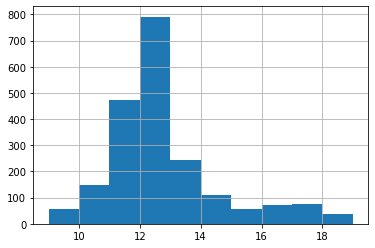

In [4]:
caly_df['time'].hist()

<AxesSubplot:>

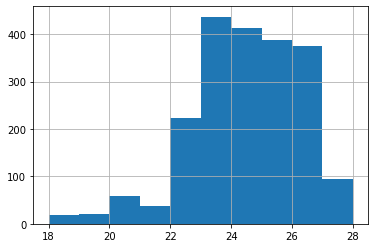

In [5]:
caly_df['temperatur'].hist()

In [6]:
caly_label=caly_df['Sleep position']

In [7]:
del caly_df['Sleep poze']
del caly_df['Sleep position']
del caly_df['splashing reaction']
del caly_df['splashing reaction 2']
del caly_df['touch reaction']
del caly_df['behaviour on hand']
del caly_df['after putting away']

In [8]:
del caly_df['SPs | active']
del caly_df['SPs | back wall']
del caly_df['SPs | front wall']
del caly_df['SPs | in the hideout']
del caly_df['SPs | left wall']
del caly_df['SPs | on coconut']
del caly_df['SPs | right wall']

In [9]:
caly_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2067 entries, 0 to 2066
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   time                   2067 non-null   int64
 1   temperatur             2067 non-null   int64
 2   SPz | S shape          2067 non-null   int64
 3   SPz | U shape          2067 non-null   int64
 4   SPz | active           2067 non-null   int64
 5   SPz | straight         2067 non-null   int64
 6   SR | no movement       2067 non-null   int64
 7   SR | moves             2067 non-null   int64
 8   SR | moves the head    2067 non-null   int64
 9   SR2 | does not licks   2067 non-null   int64
 10  SR2 | licks            2067 non-null   int64
 11  TR | no movement       2067 non-null   int64
 12  TR | runs              2067 non-null   int64
 13  TR | moves             2067 non-null   int64
 14  BoH | no movement      2067 non-null   int64
 15  BoH | runs             2067 non-null  

In [10]:
caly_label

0       in the hideout
1       in the hideout
2               active
3               active
4       in the hideout
             ...      
2062        on coconut
2063         back wall
2064            active
2065            active
2066        front wall
Name: Sleep position, Length: 2067, dtype: object

In [35]:
param_grid = {
    'criterion':['friedman_mse','mse'],#
    'min_samples_split':range(5,31,15), #
    'min_samples_leaf': range(5,31,15),     #
    'max_leaf_nodes':range(5,36,10), #
    'max_depth':list(range(5, 36,10)), #
    'n_estimators':[100],
    'learning_rate':[0.1,0.4],#
    'max_features':['auto','sqrt','log2',None],
    'min_weight_fraction_leaf':[0.0,0.2],
    'min_impurity_decrease':[0.0,0.2]
}

In [10]:
f1 = make_scorer(f1_score , average='macro')

In [18]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 4096 candidates, totalling 8192 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'criterion': ['friedman_mse', 'mse'],
                         'learning_rate': [0.1, 0.4],
                         'max_depth': [5, 15, 25, 35],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'max_leaf_nodes': range(5, 36, 10),
                         'min_impurity_decrease': [0.0, 0.2],
                         'min_samples_leaf': range(5, 31, 15),
                         'min_samples_split': range(5, 31, 15),
                         'min_weight_fraction_leaf': [0.0, 0.2],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [19]:
grid_search_1.best_score_ 

0.31347063981971346

In [20]:
grid_search_1.best_estimator_

GradientBoostingClassifier(learning_rate=0.4, max_depth=5, max_features='sqrt',
                           max_leaf_nodes=5, min_impurity_decrease=0.2,
                           min_samples_leaf=5, min_samples_split=20,
                           random_state=42)

In [21]:
grid_search_1.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.4,
 'max_depth': 5,
 'max_features': 'sqrt',
 'max_leaf_nodes': 5,
 'min_impurity_decrease': 0.2,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [43]:
param_grid = {
    'criterion':['mse'],#
    'min_samples_split':range(5,25,5), 
    'min_samples_leaf': range(5,25,5),     
    'max_leaf_nodes':range(5,30,5), 
    'max_depth':list(range(5, 18,3)), 
    'n_estimators':[100],
    'learning_rate':[0.2,0.4,0.6],
    'max_features':['sqrt'], #
    'min_weight_fraction_leaf':[0.0],
    'min_impurity_decrease':[0,0.2,0.4]
}

In [44]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 3600 candidates, totalling 7200 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.2, 0.4, 0.6],
                         'max_depth': [5, 8, 11, 14, 17],
                         'max_features': ['sqrt'],
                         'max_leaf_nodes': range(5, 30, 5),
                         'min_impurity_decrease': [0, 0.2, 0.4],
                         'min_samples_leaf': range(5, 25, 5),
                         'min_samples_split': range(5, 25, 5),
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [45]:
grid_search_1.best_score_

0.3147691551370869

In [46]:
grid_search_1.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.2, max_depth=11,
                           max_features='sqrt', max_leaf_nodes=10,
                           min_impurity_decrease=0, min_samples_leaf=15,
                           min_samples_split=5, random_state=42)

In [47]:
grid_search_1.best_params_

{'criterion': 'mse',
 'learning_rate': 0.2,
 'max_depth': 11,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 15,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [50]:
param_grid = {
    'criterion':['mse'],#
    'min_samples_split':range(2,6,1), 
    'min_samples_leaf': range(13,17,1),     
    'max_leaf_nodes':range(8,12,1), 
    'max_depth':list(range(8, 14,1)), 
    'n_estimators':[100],
    'learning_rate':[0.1,0.2],
    'max_features':['sqrt'], #
    'min_weight_fraction_leaf':[0.0],
    'min_impurity_decrease':[0]
}

In [51]:
dt_1 = GradientBoostingClassifier(random_state=42)
grid_search_1 = GridSearchCV(estimator = dt_1, param_grid = param_grid, 
                          cv = 2, n_jobs = 1, verbose = 1, scoring=f1)
grid_search_1.fit(caly_df, np.ravel(caly_label))

Fitting 2 folds for each of 768 candidates, totalling 1536 fits


GridSearchCV(cv=2, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=1,
             param_grid={'criterion': ['mse'], 'learning_rate': [0.1, 0.2],
                         'max_depth': [8, 9, 10, 11, 12, 13],
                         'max_features': ['sqrt'],
                         'max_leaf_nodes': range(8, 12),
                         'min_impurity_decrease': [0],
                         'min_samples_leaf': range(13, 17),
                         'min_samples_split': range(2, 6),
                         'min_weight_fraction_leaf': [0.0],
                         'n_estimators': [100]},
             scoring=make_scorer(f1_score, average=macro), verbose=1)

In [52]:
grid_search_1.best_score_

0.3147691551370869

In [53]:
grid_search_1.best_estimator_

GradientBoostingClassifier(criterion='mse', learning_rate=0.2, max_depth=9,
                           max_features='sqrt', max_leaf_nodes=10,
                           min_impurity_decrease=0, min_samples_leaf=15,
                           random_state=42)

In [54]:
grid_search_1.best_params_

{'criterion': 'mse',
 'learning_rate': 0.2,
 'max_depth': 9,
 'max_features': 'sqrt',
 'max_leaf_nodes': 10,
 'min_impurity_decrease': 0,
 'min_samples_leaf': 15,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100}

In [49]:
caly_df

,time,temperatur,SPz_|_S_shape,SPz_|_U_shape,SPz_|_active,SPz_|_straight,SPs_|_active,SPs_|_back_wall,SPs_|_front_wall,SPs_|_in_the_hideout,...,TR_|_runs,TR_|_moves,BoH_|_no_movement,BoH_|_runs,BoH_|_jumps,BoH_|_moves,ApA_|_runs,ApA_|_hides,ApA_|_moves,ApA_|_stayes_in_place
0,10,23,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
1,10,23,0,1,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
2,10,23,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,10,23,0,0,1,0,1,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,10,23,0,0,0,1,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2062,16,26,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2063,16,26,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2064,16,26,0,0,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2065,16,26,0,0,1,0,1,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [11]:
kfold = KFold(n_splits=5, shuffle=False)
dane_do_zapisu_1=pd.DataFrame()
licznik=1
wart_1=[]

for train, test in kfold.split(caly_df, caly_label):
    
    RF_1 =GradientBoostingClassifier(criterion='mse', learning_rate=0.2, max_depth=9,
                           max_features='sqrt', max_leaf_nodes=10,
                           min_impurity_decrease=0, min_samples_leaf=15,
                           random_state=42)
    
    RF_1.fit(caly_df.iloc[train],
             caly_label.iloc[train])
    predykcje=RF_1.predict(caly_df.iloc[test])
    dane_folda_1=pd.DataFrame({"pred": predykcje.ravel(),
                                "obs": caly_label.iloc[test],
                                "Fold":licznik})
    dane_do_zapisu_1=pd.concat([dane_do_zapisu_1,dane_folda_1])
    
    sredni_blad=f1_score(caly_label.iloc[test], predykcje, average='macro')
    wart_1.append(sredni_blad)
    licznik+=1

In [12]:
wart_1

[0.26502050645842706,
 0.2897243107769424,
 0.2852465464364114,
 0.29466021887648425,
 0.3116646480881376]

In [13]:
sum(wart_1)/len(wart_1)

0.2892632461272805

In [14]:
confusion_matrix(dane_do_zapisu_1['obs'], dane_do_zapisu_1['pred'], labels=list(pd.unique(caly_label)))

array([[458,   3,   3,  84, 110,   6,  21],
       [  1, 482,   0,   0,   0,   0,   0],
       [ 25,   1,   1,   8,  19,   0,   5],
       [180,   0,   3,  30,  33,   0,  13],
       [140,   0,   3,  28, 104,   4,  44],
       [ 37,   0,   0,   7,  22,   0,   2],
       [ 91,   0,   1,  21,  68,   4,   5]], dtype=int64)

In [15]:
class_names = RF_1.classes_


In [16]:
cf_matrix=confusion_matrix(dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['obs'],
                           dane_do_zapisu_1[dane_do_zapisu_1['Fold']==5]['pred'],
                           labels=class_names)

Text(0.5, 1.0, 'GradientBoosting - sleep position')

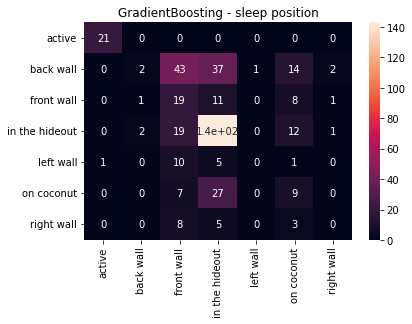

In [17]:
x_axis_labels = class_names
y_axis_labels = class_names

# create seabvorn heatmap with required labels
ax=sns.heatmap(cf_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels,annot=True)
ax.set_title('GradientBoosting - sleep position')

In [19]:
dane_do_zapisu_1.to_csv('Geko_GB__sleep position.csv',sep=',')